In [18]:
import numpy as np
import qiskit as qk
from qiskit import Aer
import itertools

In [19]:
def expectation(circuit,shots):
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit,shots=shots).result()
    counts = result.get_counts()
    
    #Get keys of dictionary
    keys = list(counts.keys())

    #Calculate expectation value of Z^n 
    expectation_value = 0
    for i in range(len(keys)):
        tmp = keys[i]

        #Extract number of zeros and ones
        num_zeros = tmp.count('0')
        num_ones = tmp.count('1')

        #Determine eigenvalue of operator
        eigenvalue = 1**num_zeros * (-1)**num_ones
        
        #Calculate expectation value
        expectation_value += eigenvalue * counts[tmp]/shots
        
    return expectation_value

In [20]:
def phi_ij(xi,xj):
    return (np.pi-xi)*(np.pi-xj)

def U1(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)

    circuit.s(1)
    circuit.s(1)
    return circuit


In [21]:
def U2(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)
    return circuit

In [22]:
def U3(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)
    return circuit

In [23]:
def U4(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)

    circuit.sdg(1)
    circuit.sdg(1)
    return circuit

In [24]:
def V1(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.s(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.s(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1)
    return circuit


In [25]:
def V2(x,n_part,circuit):
    #Create circuit
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.s(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1)
    return circuit

In [26]:
def V3(x,n_part,circuit):
    #Create circuit
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.s(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1)
    return circuit

In [27]:
def V4(x,n_part,circuit):
    #Create circuit
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1) 
    return circuit

In [28]:
#Original circuit
x = np.array([0.6,0.2,0.3,0.8])
n = 4
n_part = 2
d = 1
circuit_test = qk.QuantumCircuit(n,n)
shots = 1000

U_original_test = U_original(circuit_test,x,n,d)
expectation_original = expectation(U_original_test,shots)

U1_test = U1(x,n_part)
expectation_U1 = expectation(U1_test,shots)

U2_test = U2(x,n_part)
expectation_U2 = expectation(U2_test,shots)

U3_test = U3(x,n_part)
expectation_U3 = expectation(U3_test,shots)

U4_test = U4(x,n_part)
expectation_U4 = expectation(U4_test,shots)

V1_test = V1(x,n_part)
expectation_V1 = expectation(V1_test,shots)

V2_test = V2(x,n_part)
expectation_V2 = expectation(V2_test,shots)

V3_test = V3(x,n_part)
expectation_V3 = expectation(V3_test,shots)

V4_test = V4(x,n_part)
expectation_V4 = expectation(V4_test,shots)

expectation_partitioned = expectation_U1*expectation_V1* + expectation_U2*expectation_V2 + expectation_U3*expectation_V3 + expectation_U4*expectation_V4

# print(expectation_U1)
# print(expectation_U2)
# print(expectation_U3)
# print(expectation_U4)

# print(expectation_V1)
# print(expectation_V2)
# print(expectation_V3)
# print(expectation_V4)

print(expectation_original)
print(expectation_partitioned)

NameError: name 'U_original' is not defined

In [56]:
U_partitioned = [U1,U2,U3,U4]
V_partitioned = [V1,V2,V3,V4]

def partitioned_circuit(x,n_part,d,shots):
    #Initialize circuit
    circuit1 = qk.QuantumCircuit(n_part,n_part)
    circuit2 = qk.QuantumCircuit(n_part,n_part)

    assert d<=2, "d must be smaller or equal to 2"

    expectation_value = 0
    if d == 1:
        combinations = [(i, i) for i in range(0,4)]
        for i in range(len(combinations)):
            circuit1 = U_partitioned[combinations[i][0]](x,n_part,circuit1)
            circuit1.barrier()
            circuit1.z(range(n_part))
            circuit1.measure(range(n_part),range(n_part))

            circuit2 = V_partitioned[combinations[i][1]](x,n_part,circuit2)
            circuit2.barrier()
            circuit2.z(range(n_part))
            circuit2.measure(range(n_part),range(n_part))

            expectation_1 = expectation(circuit1,shots)
            expectation_2 = expectation(circuit2,shots)

            expectation_value += expectation_1*expectation_2

    if d == 2:
        combinations = [((i, i), (j, j)) for i in range(0, 4) for j in range(0, 4)]
        for i in range(len(combinations)):
            circuit1 = U_partitioned[combinations[i][0][0]](x,n_part,circuit1)
            circuit1 = V_partitioned[combinations[i][0][1]](x,n_part,circuit1)
            circuit1.barrier()
            circuit1.z(range(n_part))
            circuit1.measure(range(n_part),range(n_part))

            circuit2 = U_partitioned[combinations[i][1][0]](x,n_part,circuit2)
            circuit2 = V_partitioned[combinations[i][1][1]](x,n_part,circuit2)
            circuit2.barrier()
            circuit2.z(range(n_part))
            circuit2.measure(range(n_part),range(n_part))

            expectation_1 = expectation(circuit1,shots)
            expectation_2 = expectation(circuit2,shots)

            expectation_value += expectation_1*expectation_2
    return expectation_value

partitioned_circuit(x,n_part,1,1000)


-0.0013359999999999997

/home/pschaefers/master/QCQP/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


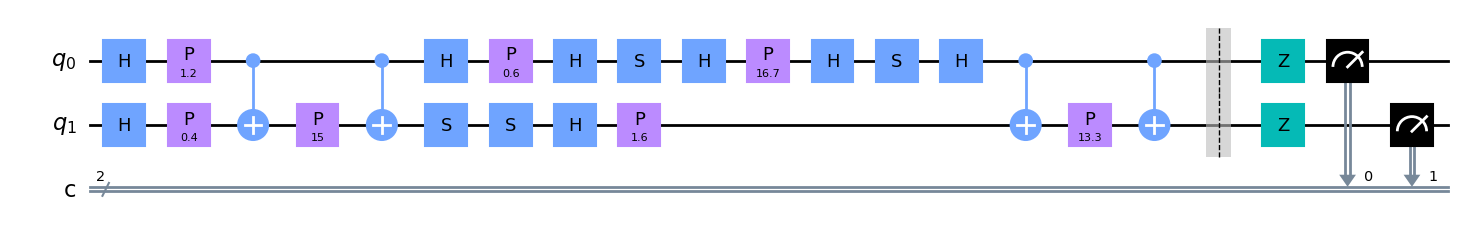

/home/pschaefers/master/QCQP/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


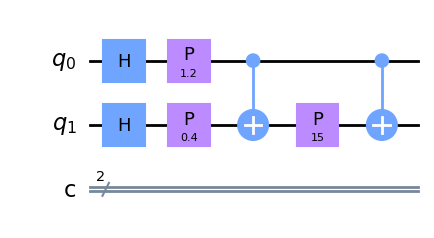

In [38]:
U2(x,n_part,qk.QuantumCircuit(2,2)).draw(output='mpl')

In [12]:
# Case when d=1
d = 1
list_d1 = [(i, i) for i in range(0,4)]

# Case when d=2
d = 2
list_d2 = [((i, i), (j, j)) for i in range(0, 4) for j in range(0, 4)]


In [16]:
print(list_d1)
print(list_d2)

for i in list_d2:
    print(i[0],i[1])

[(0, 0), (1, 1), (2, 2), (3, 3)]
[((0, 0), (0, 0)), ((0, 0), (1, 1)), ((0, 0), (2, 2)), ((0, 0), (3, 3)), ((1, 1), (0, 0)), ((1, 1), (1, 1)), ((1, 1), (2, 2)), ((1, 1), (3, 3)), ((2, 2), (0, 0)), ((2, 2), (1, 1)), ((2, 2), (2, 2)), ((2, 2), (3, 3)), ((3, 3), (0, 0)), ((3, 3), (1, 1)), ((3, 3), (2, 2)), ((3, 3), (3, 3))]
(0, 0) (0, 0)
(0, 0) (1, 1)
(0, 0) (2, 2)
(0, 0) (3, 3)
(1, 1) (0, 0)
(1, 1) (1, 1)
(1, 1) (2, 2)
(1, 1) (3, 3)
(2, 2) (0, 0)
(2, 2) (1, 1)
(2, 2) (2, 2)
(2, 2) (3, 3)
(3, 3) (0, 0)
(3, 3) (1, 1)
(3, 3) (2, 2)
(3, 3) (3, 3)
